# Gathering Data

In [1]:
import tweepy
import requests
import pandas as pd
import numpy as np
import json
import time
import math
import re
from timeit import default_timer as timer
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering data from url

In [2]:
#1. Import the Twitter archive CSV file into a DataFrame using the URL due to technical issues when trying to pull the straight csv
#arc_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')

### Downloading Image Prediction TSV using "Requests" library

In [3]:
#2. Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
# Note: Code below is from Gathering section; Lesson 2, section 18, example 2
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(resp.content)
    
# Creating a DataFrame from the "tweet image predictions" TSV file
img_df = pd.read_csv('image_predictions.tsv', sep='\t')
img_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Gathering and storing data from Twitters API using "Tweepy" library

In [4]:
# Declare Twitter API keys and access tokens
consumer_key = 'B9B2lLF0I8tRjyYlV1rz5phB8'
consumer_secret = '9n5R26YIwsFPZxTzZmsYAY1rQFqpVH4afbWEqba43DWTWwE5lU'
access_token = '1155233121610059776-78pOWlPeUCnz2o64igaZxeyyXMjIiA'
access_secret = '1aQEQjob2y7vgsgrrmbKi1R1A4fy3Exx1SvgrYhZf4wwX'

In [5]:
# Authenticating the connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
# Adding a new line for each tweets json data 
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
        for tweet_id in archive_df['tweet_id']:
            try:
                # Get tweet data using Twitter API
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except:
                continue

Rate limit reached. Sleeping for: 727
Rate limit reached. Sleeping for: 729


In [7]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
tweet_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
json_tweets_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
json_tweets_df.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7979           37240
1  892177421306343426           5924           32022
2  891815181378084864           3912           24125
3  891689557279858688           8128           40559
4  891327558926688256           8812           38791

# Assessing Data


In [9]:
archive_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [10]:
archive_df[archive_df.in_reply_to_status_id.notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
149   863079547188785154           6.671522e+17         4.196984e+09   
179   857214891891077121           8.571567e+17         1.806710e+08   
184   856526610513747968           8.558181e+17         4.196984e+09   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
251   844979544864018432           7.590995e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
565   802265048156610565           7.331095e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
...                  ...                    ...                  ...   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1501  692142790915014657           6.920419e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1630  684538444857667585           6.844811e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1842  675870721063669760           6.757073e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1852  675707330206547968           6.754971e+17         4.196984e+09   
1866  675349384339542016           6.749998e+17         4.196984e+09   
1882  674999807681908736           6.747934e+17         4.196984e+09   
1885  674793399141146624           6.717299e+17         4.196984e+09   
1892  674754018082705410           6.747522e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
# Checking to see if there are any records in archive_df which are retweets
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

In [13]:
# Check for duplicate tweet_ids in the twitter archive
sum(archive_df.tweet_id.duplicated())

0

In [14]:
# The sources in twitter archive and number of occurences 
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# Check if there are any records in archive_df is missing in img_df table
len(archive_df[~archive_df.tweet_id.isin(img_df.tweet_id)])

281

In [16]:
# Sort by rating_denominator values
archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [17]:
# Sort by rating_numerator values to see what the most common values are 
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [18]:
archive_df.name.value_counts().sort_index(ascending=False).head(20)

very            5
unacceptable    1
this            1
the             8
such            1
space           1
quite           4
one             4
old             1
officially      1
not             2
my              1
mad             2
light           1
life            1
just            4
infuriating     1
incredibly      1
his             1
getting         2
Name: name, dtype: int64

In [19]:
# Number of records with both doggo and pupper columns not None
len(archive_df[(archive_df.doggo != 'None') & (archive_df.pupper != 'None')])

12

In [20]:
img_df.sample(5)

tweet_id                                          jpg_url  \
368   672968025906282496  https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg   
1514  786664955043049472  https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg   
311   671544874165002241  https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg   
831   693642232151285760  https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg   
1436  773922284943896577  https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg   

      img_num                  p1   p1_conf  p1_dog                p2  \
368         1          toy_poodle  0.678046    True  miniature_poodle   
1514        1            Leonberg  0.512034    True          keeshond   
311         1         feather_boa  0.240858   False               wig   
831         1  Scottish_deerhound  0.111893    True          bluetick   
1436        1          Pomeranian  0.554331    True           Samoyed   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
368   0.160273    True                     Airedale  0.065649    True  
1514  0.464816    True                   Pomeranian  0.007812    True  
311   0.085946   False                         wool  0.040674   False  
831   0.074302    True  German_short-haired_pointer  0.067000    True  
1436  0.432158    True                         chow  0.003199    True

In [21]:
# checking for any odd spellings 
print(img_df.p1.nunique())
print(img_df.p1.str.lower().nunique())
print(img_df.p2.nunique())
print(img_df.p2.str.lower().nunique())

378
378
405
404


In [22]:
# looking at results with duplicate urls
img_df[img_df.jpg_url.duplicated(keep = False)].sort_values(
    by = 'jpg_url').head()

tweet_id                                            jpg_url  \
480   675354435921575936  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1864  842892208864923648  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
1641  807106840509214720  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
1703  817181837579653120  https://pbs.twimg.com/ext_tw_video_thumb/81596...   

      img_num               p1   p1_conf  p1_dog                p2   p2_conf  \
480         1          upright  0.303415   False  golden_retriever  0.181351   
1297        1          upright  0.303415   False  golden_retriever  0.181351   
1864        1        Chihuahua  0.505370    True        Pomeranian  0.120358   
1641        1        Chihuahua  0.505370    True        Pomeranian  0.120358   
1703        1  Tibetan_mastiff  0.506312    True   Tibetan_terrier  0.295690   

      p2_dog                p3   p3_conf  p3_dog  
480     True  Brittany_spaniel  0.162084    True  
1297    True  Brittany_spaniel  0.162084    True  
1864    True       toy_terrier  0.077008    True  
1641    True       toy_terrier  0.077008    True  
1703    True        otterhound  0.036251    True

In [23]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
json_tweets_df.sample(5)

tweet_id  retweet_count  favorite_count
2224  667873844930215936            396             620
1659  681981167097122816           1065            2875
400   822610361945911296           3095           15368
703   783334639985389568          12313           30522
1924  673700254269775872            563            1435

In [25]:
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [26]:
# looking for duplicate tweet ids 
json_tweets_df[json_tweets_df.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count]
Index: []

### Quality

####  Twitter archive (archive_df)
> * Data contains retweets which means there are duplicates
> * There are multiple erroneous datatypes such as; in_reply_to_status_id, in_reply_to_user_id and timestamp columns.
> * There are many tweet_id(s) in archive_df that are missing in img_df 
> * Text column contains untruncated text instead of displayable text
> * rating_numerator column has values > 14 (e.g. 1176)
> * Some records have more than one dog stage
> * rating_denominator column has values other than 10
> * tweet_id should be string.
> * There are erroneous dog names starting with lowercase characters and prepositions (e.g. a, an, actually) 
> * Retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from archive_df are useless without retweets. Therefore, we can drop these columns.

### Tidiness

> * "breed" column should be added to archive_df table (from img_df)
> * retweet_count and favorite_count columns from json_tweets_df (tweet status) should be joined with archive_df 
> * Columns doggo, floofer, pupper and puppo columns in arhive_df table should be merged into one column named "stage"


# Cleaning

In [282]:
# Make copies of files
arc_clean = archive_df.copy()
img_clean = img_df.copy()
tweets_clean = json_tweets_df.copy()

## Quality

archive_df - **Data contains retweets which means there are duplicates**

**Define**
Only keep the rows from archive_df that are original retweets (which can be identified by retweeted_status_id column being null)


***Code***

In [283]:
arc_clean = arc_clean[arc_clean.retweeted_status_id.isnull()]

#### ***Test***

In [284]:
print(len(arc_clean[arc_clean.retweeted_status_id.isnull() == False]))

0


archive_df - **There are many tweet_id(s) in archive_df that are missing in img_df**

**Define**
Keep only archive_df records whose tweet_id exists in img_df table

***Code***

In [285]:
arc_clean = arc_clean[arc_clean.tweet_id.isin(img_df.tweet_id)]

#### ***Test***

In [286]:
len(arc_clean[~arc_clean.tweet_id.isin(img_df.tweet_id)])

0

In [287]:
arc_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

archive_df - **Creating a "gender" column**

**Define**
create a function to determine gender key words from the text and apply to the archive_df

***Code***

In [288]:
# Setting up gender lists and container
male = ['boy', 'he', "he's", 'hes', "he's", 'him', 'himself', 'his',  
         'male', 'stud']
female = ['bitch', 'female', 'girl', 'her', 'hers', "her's",
          'herself', 'she', 'shes', "she's"]

# Create a gender function
def gender_calc(text):
    text = text.replace("'", "")
    text = text.lower().split()
    for word in text:
        if word in male:
            return 0
        elif word in female:
            return 1
        else:
            pass
    else:
        return np.nan

In [289]:
# Apply the function.
arc_clean['gender'] = arc_clean['text'].apply(gender_calc)

archive_df - **There are multiple erroneous datatypes such as; in_reply_to_status_id, in_reply_to_user_id and timestamp columns.**

**Define**
Remove columns in_reply_to_status_id, in_reply_to_user_id and timestamp from archive_df

***Code*** 

In [290]:
arc_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### ***Test***

In [291]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
gender                1351 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 218.1+ KB


archive_df - **There are multiple erroneous datatypes such as; in_reply_to_status_id, in_reply_to_user_id and timestamp columns.**

**Define**
Convert in_reply_to_status_id and in_reply_to_user_id to data type integer and Convert timestamp to datetime data type

***Code*** 

In [292]:
# # Filling the null values with an integer value 0 
# arc_clean.in_reply_to_status_id = arc_clean.in_reply_to_status_id.fillna(0)
# arc_clean.in_reply_to_user_id = arc_clean.in_reply_to_user_id.fillna(0)

# # Converting to datatype int
# arc_clean.in_reply_to_status_id = arc_clean.in_reply_to_status_id.astype(np.int64)
# arc_clean.in_reply_to_user_id = arc_clean.in_reply_to_user_id.astype(np.int64)

# Using pandas to convert to timestamp
arc_clean.timestamp = pd.to_datetime(arc_clean.timestamp)

#### ***Test***

In [293]:
# Nice
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
gender                1351 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 218.1+ KB


archive_df - **Some records have more than one dog stage.**

**Define**
Investigate scenarios in which records have more than one dog stage and determine what shall be done to clean it up

***Code*** 

In [294]:
print(len(arc_clean[(arc_clean.doggo != 'None') & (arc_clean.floofer != 'None')]))
print(len(arc_clean[(arc_clean.doggo != 'None') & (arc_clean.pupper != 'None')]))
print(len(arc_clean[(arc_clean.doggo != 'None') & (arc_clean.puppo != 'None')]))

1
9
1


In [295]:
# This should actually be a "floofer", so drop "doggo"
arc_clean[(arc_clean.doggo != 'None') & (arc_clean.floofer != 'None')].text

200    At first I thought this was a shy doggo, but i...
Name: text, dtype: object

In [296]:
arc_clean.loc[200]

tweet_id                                             854010172552949760
timestamp                                           2017-04-17 16:34:26
source                <a href="http://twitter.com/download/iphone" r...
text                  At first I thought this was a shy doggo, but i...
expanded_urls         https://twitter.com/dog_rates/status/854010172...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                               None
doggo                                                             doggo
floofer                                                         floofer
pupper                                                             None
puppo                                                              None
gender                                                              NaN
Name: 200, dtype: object

In [297]:
# This should actually be a "puppo", so drop "doggo"
arc_clean[(arc_clean.doggo != 'None') & (arc_clean.puppo != 'None')].text

191    Here's a puppo participating in the #ScienceMa...
Name: text, dtype: object

In [298]:
arc_clean.loc[191]

tweet_id                                             855851453814013952
timestamp                                           2017-04-22 18:31:02
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a puppo participating in the #ScienceMa...
expanded_urls         https://twitter.com/dog_rates/status/855851453...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                             doggo
floofer                                                            None
pupper                                                             None
puppo                                                             puppo
gender                                                                1
Name: 191, dtype: object

In [299]:
# Note: 
# 9 records have both "doggo" and "pupper" as possible stages. 
# The dogtionary's description of a "doggo" gives reason to believe doggo and pupper are sometimes used interchangeably
# Therefore, we should set the pupper column as "None" for these 9 records.
arc_clean[(arc_clean.doggo != 'None') & (arc_clean.pupper != 'None')]

tweet_id           timestamp  \
460   817777686764523521 2017-01-07 16:59:28   
531   808106460588765185 2016-12-12 00:29:28   
565   802265048156610565 2016-11-25 21:37:47   
575   801115127852503040 2016-11-22 17:28:25   
705   785639753186217984 2016-10-11 00:34:48   
889   759793422261743616 2016-07-31 16:50:42   
956   751583847268179968 2016-07-09 01:08:47   
1063  741067306818797568 2016-06-10 00:39:48   
1113  733109485275860992 2016-05-19 01:38:16   

                                                 source  \
460   <a href="http://twitter.com/download/iphone" r...   
531   <a href="http://twitter.com/download/iphone" r...   
565   <a href="http://twitter.com/download/iphone" r...   
575   <a href="http://twitter.com/download/iphone" r...   
705   <a href="http://twitter.com/download/iphone" r...   
889   <a href="http://twitter.com/download/iphone" r...   
956   <a href="http://twitter.com/download/iphone" r...   
1063  <a href="http://twitter.com/download/iphone" r...   
1113  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
460   This is Dido. She's playing the lead role in "...   
531   Here we have Burke (pupper) and Dexter (doggo)...   
565   Like doggo, like pupper version 2. Both 11/10 ...   
575   This is Bones. He's being haunted by another d...   
705   This is Pinot. He's a sophisticated doggo. You...   
889   Meet Maggie &amp; Lila. Maggie is the doggo, L...   
956   Please stop sending it pictures that don't eve...   
1063  This is just downright precious af. 12/10 for ...   
1113  Like father (doggo), like son (pupper). Both 1...   

                                          expanded_urls  rating_numerator  \
460   https://twitter.com/dog_rates/status/817777686...                13   
531   https://twitter.com/dog_rates/status/808106460...                12   
565   https://twitter.com/dog_rates/status/802265048...                11   
575   https://twitter.com/dog_rates/status/801115127...                12   
705   https://twitter.com/dog_rates/status/785639753...                10   
889   https://twitter.com/dog_rates/status/759793422...                12   
956   https://twitter.com/dog_rates/status/751583847...                 5   
1063  https://twitter.com/dog_rates/status/741067306...                12   
1113  https://twitter.com/dog_rates/status/733109485...                12   

      rating_denominator    name  doggo floofer  pupper puppo  gender  
460                   10    Dido  doggo    None  pupper  None     1.0  
531                   10    None  doggo    None  pupper  None     NaN  
565                   10    None  doggo    None  pupper  None     NaN  
575                   10   Bones  doggo    None  pupper  None     0.0  
705                   10   Pinot  doggo    None  pupper  None     0.0  
889                   10  Maggie  doggo    None  pupper  None     NaN  
956                   10    None  doggo    None  pupper  None     NaN  
1063                  10    just  doggo    None  pupper  None     NaN  
1113                  10    None  doggo    None  pupper  None     NaN

In [300]:
# setting pupper column as None for records which have both doggo and pupper
arc_clean['pupper'][(arc_clean.doggo != 'None') & (arc_clean.pupper != 'None')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [301]:
# From looking at the text for tweet_id's (855851453814013952, 854010172552949760) we know we need to drop the "doggo" entries
arc_clean['doggo'][arc_clean.tweet_id.isin([855851453814013952, 854010172552949760])] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [302]:
len(arc_clean[((arc_clean.doggo != 'None') & (arc_clean.pupper != 'None'))
        | ((arc_clean.doggo != 'None') & (arc_clean.floofer != 'None')) 
                  | ((arc_clean.doggo != 'None') & (arc_clean.puppo != 'None'))])

0

## Tidiness

archive_df - **Columns doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"**

**Define**
Merging the doggo, floofer, pupper and puppo columns together as "stage".

***Code*** 

In [303]:
# Merging the columns together into one called "stage" then dropping the individual coumns.
arc_clean['stage'] = arc_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [304]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
gender                1351 non-null float64
stage                 1994 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 251.4+ KB


In [305]:
arc_clean.stage.value_counts()

None       1688
pupper      203
doggo        72
puppo        23
floofer       8
Name: stage, dtype: int64

archive_df - **There are erroneous dog names starting with lowercase characters (e.g. a, an, actually)**

**Define**
Replace lowercase values in the name column with "None".

***Code*** 

In [306]:
arc_clean['name'][arc_clean['name'].str.match('[a-z]+')]
print(len(arc_clean['name'][arc_clean['name'].str.match('[a-z]+')]))

98


In [307]:
arc_clean['name'][arc_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [308]:
print(len(arc_clean['name'][arc_clean['name'].str.match('[a-z]+')]))

0


archive_df - **Numerator values greater than 14 and denominators values not equal to 10 exist in the data set**

**Define**
If numerator is < 14 or denominator is == 10, keep the rows. Otherwise delete them with a programmatic cleaning approach. Once numerator and denominator are cleaned, create a rating column and drop the individual columns

***Code*** 

In [309]:
arc_clean[arc_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


text  rating_numerator
45    This is Bella. She hopes her smile made you sm...                 5
695   This is Logan, the Chow who lived. He solemnly...                75
763   This is Sophie. She's a Jubilant Bush Pupper. ...                27
1712  Here we have uncovered an entire battalion of ...                26

In [310]:
arc_clean.loc[763]

tweet_id                                             778027034220126208
timestamp                                           2016-09-20 00:24:34
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Sophie. She's a Jubilant Bush Pupper. ...
expanded_urls         https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                     27
rating_denominator                                                   10
name                                                             Sophie
gender                                                                1
stage                                                            pupper
Name: 763, dtype: object

In [311]:
arc_clean[['rating', 'dummy']] = arc_clean.text.str.extract('((\d+.)?\d+/\d\d+)', expand = True)

In [312]:
arc_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  gender stage rating dummy  
0                  10   Phineas     0.0  None  13/10   NaN  
1                  10     Tilly     1.0  None  13/10   NaN  
2                  10    Archie     0.0  None  12/10   NaN  
3                  10     Darla     1.0  None  13/10   NaN  
4                  10  Franklin     0.0  None  12/10   NaN

In [313]:
arc_clean.rating.value_counts().sort_index()

0/10          2
1/10          4
10/10       419
11.26/10      1
11.27/10      1
11/10       396
12/10       450
121/110       1
13.5/10       1
13/10       261
14/10        35
143/130       1
144/120       1
165/150       1
1776/10       1
2/10          9
204/170       1
3/10         19
4/10         15
4/20          1
420/10        1
44/40         1
45/50         1
5/10         32
50/50         1
6/10         32
60/50         1
7/10         51
7/11          1
8/10         95
80/80         1
84/70         1
88/80         1
9.75/10       1
9/10        151
9/11          1
99/90         1
Name: rating, dtype: int64

In [314]:
# Cleanin the 'rating_numerator','rating_denominator' columns with the extracted values
arc_clean[['rating_numerator','rating_denominator']] = arc_clean.rating.str.split("/",expand=True)

In [315]:
arc_clean.rating_numerator.value_counts().sort_index()

0          2
1          4
10       419
11       396
11.26      1
11.27      1
12       450
121        1
13       261
13.5       1
14        35
143        1
144        1
165        1
1776       1
2          9
204        1
3         19
4         16
420        1
44         1
45         1
5         32
50         1
6         32
60         1
7         52
8         95
80         1
84         1
88         1
9        152
9.75       1
99         1
Name: rating_numerator, dtype: int64

In [316]:
# Converting the rating_numerator to float
arc_clean['rating_numerator'] = arc_clean['rating_numerator'].astype(float)
arc_clean['rating_denominator'] = arc_clean['rating_denominator'].astype(float)

In [317]:
# Create new column "rating"
arc_clean['ratings'] = arc_clean.rating_numerator / arc_clean.rating_denominator

In [322]:
# Found an issue with the extraction
arc_clean[arc_clean.ratings.isnull() == True]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, gender, stage, rating, dummy, ratings]
Index: []

In [323]:
#Due to the issues with extracting, this one is getting manually updated. The value from the text is 10/10 which is 1
arc_clean.at[516,'ratings'] =1

In [324]:
arc_clean.loc[[516]]

tweet_id           timestamp  \
516  810984652412424192 2016-12-19 23:06:23   

                                                source  \
516  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
516  Meet Sam. She smiles 24/7 &amp; secretly aspir...   

                                         expanded_urls  rating_numerator  \
516  https://www.gofundme.com/sams-smile,https://tw...               NaN   

     rating_denominator name  gender stage rating dummy  ratings  
516                 NaN  Sam     1.0  None    NaN   NaN      1.0

In [326]:
# Drop additional columns
arc_clean.drop(['rating_numerator', 'rating_denominator', 'dummy','rating'], inplace = True, axis = 1)

#### ***Test***

In [327]:
arc_clean.head(5)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls      name  gender stage  \
0  https://twitter.com/dog_rates/status/892420643...   Phineas     0.0  None   
1  https://twitter.com/dog_rates/status/892177421...     Tilly     1.0  None   
2  https://twitter.com/dog_rates/status/891815181...    Archie     0.0  None   
3  https://twitter.com/dog_rates/status/891689557...     Darla     1.0  None   
4  https://twitter.com/dog_rates/status/891327558...  Franklin     0.0  None   

   ratings  
0      1.3  
1      1.3  
2      1.2  
3      1.3  
4      1.2

img_df - **Tiding up the columns in the img_df**

**Define**
Renaming p1 columns and dropping p2 and p3 columns.

***Code*** 

In [328]:
# Renaming some of the useful columns from img_clean
img_clean.rename(columns = {'p1': 'breed', 
                               'p1_conf': 'confidence', 
                               'p1_dog': 'dog_or_not'}, inplace = True)

In [329]:
# These columns are not needed
img_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 
                  'p3_conf', 'p3_dog'], inplace = True, axis = 1)

All - **Merge tables together for Master view**

**Define**
 1. Retweet_count and favorite_count columns from json_tweets_df (tweet status) should be joined with archive_df
 2. Merge img_clean onto final result using "tweet_id"

***Code*** 

In [330]:
# retweet_count and favorite_count columns from json_tweets_df (tweet status) should be joined with archive_df
twitter_archive_master = arc_clean.merge(tweets_clean, on = 'tweet_id')
twitter_archive_master = twitter_archive_master.merge(img_clean, 
  on = 'tweet_id', how = 'left')
# twitter_archive_master.drop(['source', 'text', 'expanded_urls'], 
#     inplace = True, axis = 1)

In [331]:
twitter_archive_master.head(5)
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 16 columns):
tweet_id          1987 non-null int64
timestamp         1987 non-null datetime64[ns]
source            1987 non-null object
text              1987 non-null object
expanded_urls     1987 non-null object
name              1987 non-null object
gender            1344 non-null float64
stage             1987 non-null object
ratings           1987 non-null float64
retweet_count     1987 non-null int64
favorite_count    1987 non-null int64
jpg_url           1987 non-null object
img_num           1987 non-null int64
breed             1987 non-null object
confidence        1987 non-null float64
dog_or_not        1987 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 250.3+ KB


In [332]:
# Storing data into a csv
arc_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [333]:
df = twitter_archive_master

# Analyzing & Visualizing Data

In [334]:
twitter_archive_master.describe()

tweet_id       gender      ratings  retweet_count  favorite_count  \
count  1.987000e+03  1344.000000  1987.000000    1987.000000     1987.000000   
mean   7.356264e+17     0.250000     1.163630    2539.036236     8501.723201   
std    6.739210e+16     0.433174     4.071113    4544.806703    12509.426568   
min    6.660209e+17     0.000000     0.000000      11.000000       75.000000   
25%    6.758218e+17     0.000000     1.000000     568.500000     1829.000000   
50%    7.083495e+17     0.000000     1.100000    1223.000000     3830.000000   
75%    7.873602e+17     0.250000     1.200000    2879.500000    10589.500000   
max    8.924206e+17     1.000000   177.600000   80536.000000   160921.000000   

           img_num   confidence  
count  1987.000000  1987.000000  
mean      1.203322     0.593317  
std       0.561369     0.271959  
min       1.000000     0.044333  
25%       1.000000     0.361530  
50%       1.000000     0.587342  
75%       1.000000     0.844583  
max       4.000000     1.000000

In [335]:
df[df.ratings.isnull() == True]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, name, gender, stage, ratings, retweet_count, favorite_count, jpg_url, img_num, breed, confidence, dog_or_not]
Index: []

In [336]:
df

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
19    888078434458587136 2017-07-20 16:49:33   
20    887705289381826560 2017-07-19 16:06:48   
21    887517139158093824 2017-07-19 03:39:09   
22    887473957103951883 2017-07-19 00:47:34   
23    887343217045368832 2017-07-18 16:08:03   
24    887101392804085760 2017-07-18 00:07:08   
25    886983233522544640 2017-07-17 16:17:36   
26    886736880519319552 2017-07-16 23:58:41   
27    886680336477933568 2017-07-16 20:14:00   
28    886366144734445568 2017-07-15 23:25:31   
29    886258384151887873 2017-07-15 16:17:19   
...                  ...                 ...   
1957  666411507551481857 2015-11-17 00:24:19   
1958  666407126856765440 2015-11-17 00:06:54   
1959  666396247373291520 2015-11-16 23:23:41   
1960  666373753744588802 2015-11-16 21:54:18   
1961  666362758909284353 2015-11-16 21:10:36   
1962  666353288456101888 2015-11-16 20:32:58   
1963  666345417576210432 2015-11-16 20:01:42   
1964  666337882303524864 2015-11-16 19:31:45   
1965  666293911632134144 2015-11-16 16:37:02   
1966  666287406224695296 2015-11-16 16:11:11   
1967  666273097616637952 2015-11-16 15:14:19   
1968  666268910803644416 2015-11-16 14:57:41   
1969  666104133288665088 2015-11-16 04:02:55   
1970  666102155909144576 2015-11-16 03:55:04   
1971  666099513787052032 2015-11-16 03:44:34   
1972  666094000022159362 2015-11-16 03:22:39   
1973  666082916733198337 2015-11-16 02:38:37   
1974  666073100786774016 2015-11-16 01:59:36   
1975  666071193221509120 2015-11-16 01:52:02   
1976  666063827256086533 2015-11-16 01:22:45   
1977  666058600524156928 2015-11-16 01:01:59   
1978  666057090499244032 2015-11-16 00:55:59   
1979  666055525042405380 2015-11-16 00:49:46   
1980  666051853826850816 2015-11-16 00:35:11   
1981  666050758794694657 2015-11-16 00:30:50   
1982  666049248165822465 2015-11-16 00:24:50   
1983  666044226329800704 2015-11-16 00:04:52   
1984  666033412701032449 2015-11-15 23:21:54   
1985  666029285002620928 2015-11-15 23:05:30   
1986  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
11    <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
13    <a href="http://twitter.com/download/iphone" r...   
14    <a href="http://twitter.com/download/iphone" r...   
15    <a href="http://twitter.com/download/iphone" r...   
16    <a href="http://twitter.com/do

In [337]:
df = twitter_archive_master
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [338]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1949
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 16 columns):
tweet_id          1987 non-null int64
timestamp         1987 non-null datetime64[ns]
source            1987 non-null object
text              1987 non-null object
expanded_urls     1987 non-null object
name              1987 non-null object
gender            1344 non-null float64
stage             1987 non-null object
ratings           1987 non-null float64
retweet_count     1987 non-null int64
favorite_count    1987 non-null int64
jpg_url           1987 non-null object
img_num           1987 non-null int64
breed             1987 non-null object
confidence        1987 non-null float64
dog_or_not        1987 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 250.3+ KB


In [340]:
# Getting tweets by month for graphing
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')
month_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
month_tweets = month_tweets[['timestamp', 'tweet_id']]
month_tweets.head()

timestamp  tweet_id
0 2015-11-30       296
1 2015-12-31       366
2 2016-01-31       169
3 2016-02-29       111
4 2016-03-31       120

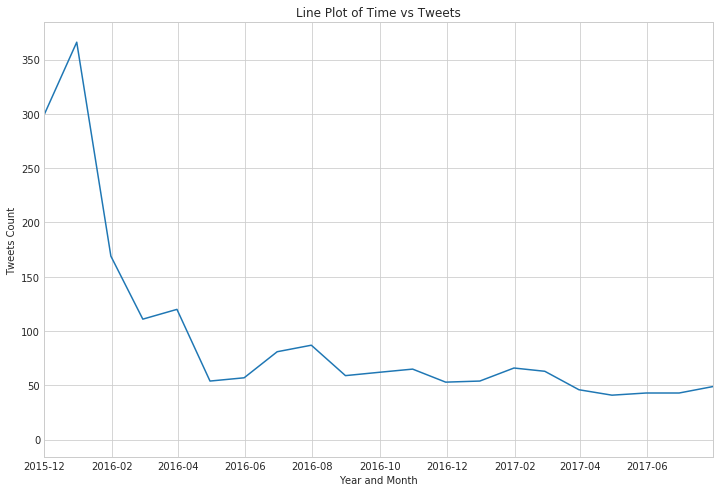

In [341]:
# Line plot of Time vs Tweets.
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.xlim([datetime.date(2015, 12, 1), datetime.date(2017, 7, 31)]) 
plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')
plt.plot(month_tweets.timestamp, month_tweets.tweet_id)
plt.title('Line Plot of Time vs Tweets');

From this we can see a clear decline in original tweets from this account

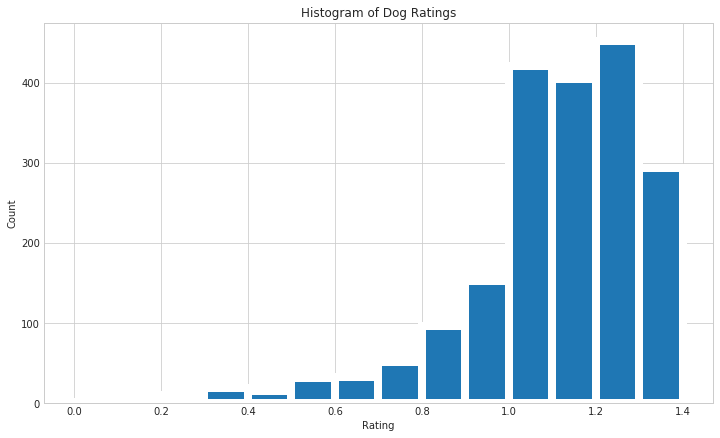

In [342]:
# Histogram of ratings
plt.figure(figsize = (12, 7))
plt.xlabel('Rating')
plt.ylabel('Count')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4]
plt.hist(x = df.ratings, 
         edgecolor='white', linewidth=8, bins = bins)
plt.title('Histogram of Dog Ratings');

Recall that these ratings are the rating_numerator/rating_denominator, thus, the numbers make sense. We can see that the majority of the numerator values are indeed "Almost always greater than 10".

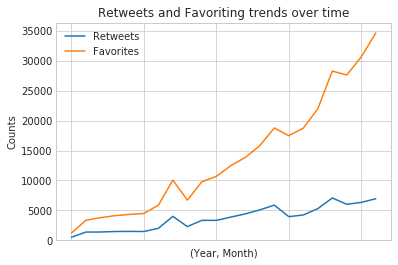

In [343]:
plt.subplots(1, sharex=True)
df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweets and Favoriting trends over time')
plt.ylabel('Counts')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('retweet_fav')

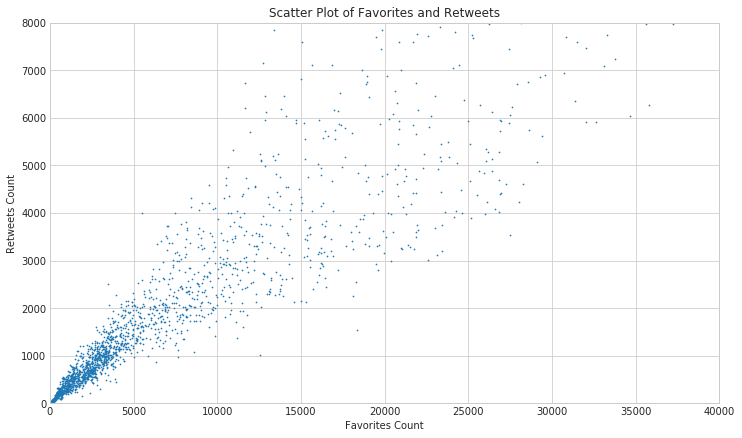

In [344]:
# Scatter plot of favorites and retweets.
plt.figure(figsize=(12, 7))
plt.xlim(0, 40000)
plt.ylim(0, 8000)
plt.xlabel('Favorites Count')
plt.ylabel('Retweets Count')
plt.plot(df.favorite_count, 
    df.retweet_count, linestyle='', 
     marker='o', markersize=0.7)
plt.title('Scatter Plot of Favorites and Retweets');

There is definitely a correltion between retweets and favoriting

In [345]:
# Creating view to see top breeds 
fav_breed = df[df.dog_or_not == True]
fav_breed = fav_breed.groupby('breed').sum().reset_index()
fav_breed = fav_breed[['breed', 'favorite_count']]
fav_breed = fav_breed.sort_values('favorite_count', ascending = False)[0:20]
fav_breed

breed  favorite_count
87           golden_retriever       1622622.0
35         Labrador_retriever       1020389.0
47                   Pembroke        954265.0
15                  Chihuahua        662097.0
53                    Samoyed        493093.0
22             French_bulldog        448946.0
79                       chow        390332.0
99                        pug        300284.0
81             cocker_spaniel        296399.0
48                 Pomeranian        291814.0
21                 Eskimo_dog        251074.0
13                   Cardigan        244520.0
93                   malamute        239689.0
14   Chesapeake_Bay_retriever        228670.0
106                toy_poodle        224188.0
36           Lakeland_terrier        206893.0
23            German_shepherd        190628.0
95         miniature_pinscher        180166.0
69                     basset        170113.0
27             Great_Pyrenees        169344.0

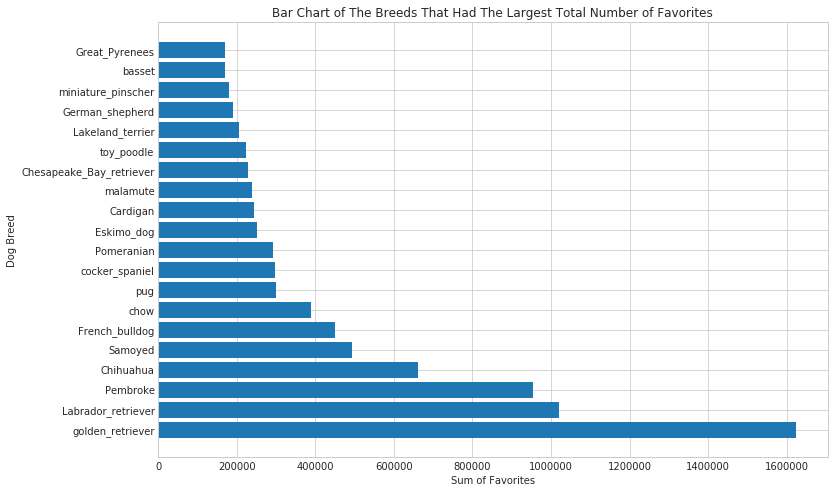

In [346]:
# Bar graph of most 'favorites' breed.
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.barh(range(len(fav_breed.breed)), fav_breed.favorite_count) 
plt.yticks(range(len(fav_breed.breed)),fav_breed.breed)
plt.xlabel('Sum of Favorites')
plt.ylabel('Dog Breed')
plt.title('Bar Chart of The Breeds That Had The Largest Total Number of Favorites');

The Golden_retriever is clearly the most popular breed. I suspect that if there were more new tweets from this account that we would see more pibulls (staffordshire terrier) posted and favorited as this breed has become very popular in the past few years.